<a href="https://colab.research.google.com/github/oreilly-japan/ml-at-work/blob/master/chap03/AUC_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![表紙](https://www.oreilly.co.jp/books/images/picture978-4-87311-947-2.gif)

이 노트북은 한빛미디어에서 발생한 [<<머신러닝 실무 프로젝트 2판>>]()의 샘플 코드입니다. 코드 설명은 책 내용을 확인합니다. 또한, 이 코드를 실행한 결과에 대해 한빛미디어 및 옮긴이는 일체의 책임을 지지 않습니다.

# 3장 학습 결과 평가하기

이 노트북은 평가 지표의 하나인 AUC와 ROC에 관해 설명한다.。

In [1]:
# 이 셀은 한글 폰트 설치시에만 실행하며,
# 실행 후 런타임을 다시 시작합니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,429 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

기반 데이터를 설정한다.

In [5]:
from sklearn.metrics import roc_curve

y_pass = [0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
y_score = [0.1, 0.2, 0.4, 0.45, 0.5, 0.65, 0.7, 0.8, 0.85, 0.95]

fpr, tpr, thresholds = roc_curve(y_pass, y_score)

print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.16666667 0.16666667 0.5
 0.5        1.        ]
[0.   0.25 0.5  0.5  0.75 0.75 1.   1.  ]
[1.95 0.95 0.85 0.8  0.7  0.5  0.45 0.1 ]


matplotlib을 사용해 ROC곡선을 표시한다.

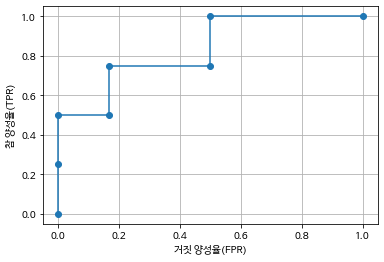

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.plot(fpr, tpr, marker='o')
plt.xlabel('거짓 양성율(FPR)')
plt.ylabel('참 양성율(TPR)')
plt.grid()
plt.show()

사이킷런에서는 AUC값을 구할 수 있다,

ROC 곡선을 그릴 때는 `fpr`과 `tpr`을 `auc` 함수로 입력하고, ROC 곡선을 그리지 않을 때도 참 합격자의 계열 `y_pass`와 그 점수의 계열 `y_score`를 `roc_auc_score`에 입력해서 구할 수 있다,

In [7]:
from sklearn.metrics import auc, roc_auc_score

print(f"AUC (auc func): {auc(fpr, tpr)}")
print(f"AUC (roc_auc_score): {roc_auc_score(y_pass, y_score)}")

AUC (auc func): 0.8333333333333333
AUC (roc_auc_score): 0.8333333333333333


AUC가 1이 되는 경우를 표시한다.

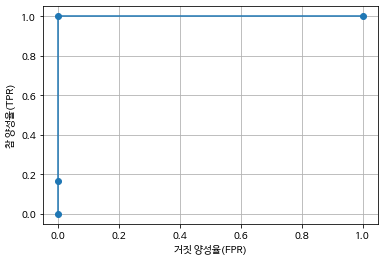

AUC (perfect): 1.0


In [8]:
y_perfect = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
y_score_perfect = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

fpr, tpr, _ = roc_curve(y_perfect, y_score)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('거짓 양성율(FPR)')
plt.ylabel('참 양성율(TPR)')
plt.grid()
plt.show()

print(f"AUC (perfect): {roc_auc_score(y_perfect, y_score)}")